In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
import plotly.express as px

df_2000_2022 = pd.read_csv('df_NOAA_2000_2021_1204_cleanned.csv')
df_events_type = pd.read_csv('event_types.csv')

In [2]:
#check events details dataframe is fully loaded 
df_2000_2022.shape

(1250341, 13)

In [3]:
#check events type dataframe is fully loaded 
df_events_type.shape

(57, 3)

In [4]:
#check events detail dataframe 
df_2000_2022.head(5)

,Unnamed: 0,date,year,month,day,state,event_type,ev_type_grp,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property
0,0,2000-12-31,2000,12,31,FLORIDA,Extreme Cold/Wind Chill,Winter,0,0,0,0,0.0
1,1,2000-12-31,2000,12,31,FLORIDA,Extreme Cold/Wind Chill,Winter,0,0,0,0,0.0
2,2,2000-12-31,2000,12,31,FLORIDA,Extreme Cold/Wind Chill,Winter,0,0,0,0,0.0
3,3,2000-12-13,2000,12,13,WEST VIRGINIA,Winter Storm,Winter,0,0,0,0,0.0
4,4,2000-08-03,2000,8,3,MISSISSIPPI,Thunderstorm Wind,Strong Wind,0,0,0,0,3500.0


In [5]:
#check events type dataframe 
df_events_type.head(1)

,EVENT_TYPE,EV_TYPE_GRP,Possibly Linked to Climate
0,Thunderstorm Wind,Strong Wind,x


In [6]:
# Rename event_type column in "df_events_type" with small case to match same column in "df_2000_2022" table
df_events_type.columns = ['event_type', 'EV_TYPE_GRP', 'Possibly Linked to Climate']

In [7]:
#check events type dataframe 
df_events_type.head(1)

,event_type,EV_TYPE_GRP,Possibly Linked to Climate
0,Thunderstorm Wind,Strong Wind,x


In [8]:
#merge two data here, and see what we can get from the property loss.
df_location = pd.merge(df_2000_2022, df_events_type, on='event_type', how='left')[['year','month','state','event_type', 'injuries_direct', 'deaths_direct', 'damage_property','EV_TYPE_GRP','Possibly Linked to Climate']]

In [9]:
#check the new dataframe created
df_location.shape

(1250341, 9)

In [10]:
#Focus in Death, Injuries and Damage numbers groubed by total of each state
df_state = df_location[['deaths_direct','injuries_direct','damage_property']].groupby(df_location.state).sum().sort_values(['deaths_direct','injuries_direct','damage_property'],ascending=False)
df_state.head(5)

,deaths_direct,injuries_direct,damage_property
state,,,
LOUISIANA,1005,691,1.102499e+11
TEXAS,975,3952,1.202637e+11
ARIZONA,949,574,3.393228e+09
CALIFORNIA,701,3044,3.487711e+10
MISSOURI,600,8238,5.505212e+09


In [11]:
#Create a separate dataframe for only climate change related weather events Death, Injuries and Damage numbers groubed by total of each state
df_state_climate = df_location[['deaths_direct','injuries_direct','damage_property']][df_location.EV_TYPE_GRP.notnull()].groupby(df_location.state).sum().sort_values(['deaths_direct'],ascending=False)
df_state_climate.head(5)

,deaths_direct,injuries_direct,damage_property
state,,,
LOUISIANA,1005,691,1.102499e+11
TEXAS,975,3952,1.202637e+11
ARIZONA,949,574,3.393228e+09
CALIFORNIA,701,3044,3.487711e+10
MISSOURI,600,8238,5.505212e+09


In [12]:
# State population numbers 2019
population = {'FLORIDA': 21477737, 
                'WEST VIRGINIA': 1792147, 
                'MISSISSIPPI': 2976149, 
                'MAINE': 1344212, 
                'CONNECTICUT': 3565287,
                'GEORGIA': 10617423, 
                'NORTH CAROLINA': 10488084, 
                'ARIZONA': 7278717, 
                'TEXAS': 28995881, 
                'TENNESSEE': 6829174,
                'MARYLAND': 6045680, 
                'NEW YORK': 19453561, 
                'OREGON': 4217737, 
                'NEW JERSEY': 8882190, 
                'KANSAS': 2913314,
                'MICHIGAN': 9986857, 
                'OKLAHOMA': 3956971, 
                'SOUTH CAROLINA': 5148714, 
                'VIRGINIA': 8535519, 
                'WISCONSIN': 5822434,
                'PENNSYLVANIA': 12801989, 
                'LOUISIANA': 4648794, 
                'DELAWARE': 973764, 
                'CALIFORNIA': 39512223, 
                'COLORADO': 5758736,
                'INDIANA': 6732219, 
                'IOWA': 3155070, 
                'ALASKA': 731545, 
                'MONTANA': 1068778, 
                'OHIO': 11689100, 
                'ILLINOIS': 12671821,
                'ARKANSAS': 3017804, 
                'HAWAII': 1415872, 
                'WASHINGTON': 7614893, 
                'MINNESOTA': 5639632, 
                'IDAHO': 1787065,
                'WYOMING': 578759, 
                'SOUTH DAKOTA': 884659, 
                'ALABAMA': 4903185, 
                'KENTUCKY': 4467673, 
                'MASSACHUSETTS': 6892503,
                'VERMONT': 623989, 
                'NEW HAMPSHIRE': 1359711, 
                'NORTH DAKOTA': 762062, 
                'MISSOURI': 6137428, 
                'DISTRICT OF COLUMBIA': 705749, 
                'NEVADA': 3080156,
                'RHODE ISLAND': 1059361, 
                'NEBRASKA': 1934408, 
                'NEW MEXICO': 2096829, 
                'UTAH': 3205958}

In [13]:
#Create new column "population" for each state
df_state_climate['population'] = df_state_climate.index.map(population)
df_state_climate.head(5)

,deaths_direct,injuries_direct,damage_property,population
state,,,,
LOUISIANA,1005,691,1.102499e+11,4648794
TEXAS,975,3952,1.202637e+11,28995881
ARIZONA,949,574,3.393228e+09,7278717
CALIFORNIA,701,3044,3.487711e+10,39512223
MISSOURI,600,8238,5.505212e+09,6137428


In [14]:
#Create new columns per 100,000 for Death and Injuries numbers by dividing num/state population multiplie by 100,000 to determine the average percapita
df_state_climate['deaths_per_100,000'] = (df_state_climate['deaths_direct'] / df_state_climate['population']) * 100000
df_state_climate['injuries_per_100,000'] = (df_state_climate['injuries_direct'] / df_state_climate['population']) * 100000
df_state_climate.head(5)

,deaths_direct,injuries_direct,damage_property,population,"deaths_per_100,000","injuries_per_100,000"
state,,,,,,
LOUISIANA,1005,691,1.102499e+11,4648794,21.618510,14.864070
TEXAS,975,3952,1.202637e+11,28995881,3.362547,13.629522
ARIZONA,949,574,3.393228e+09,7278717,13.038012,7.886005
CALIFORNIA,701,3044,3.487711e+10,39512223,1.774135,7.703945
MISSOURI,600,8238,5.505212e+09,6137428,9.776082,134.225607


/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/79909201.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)


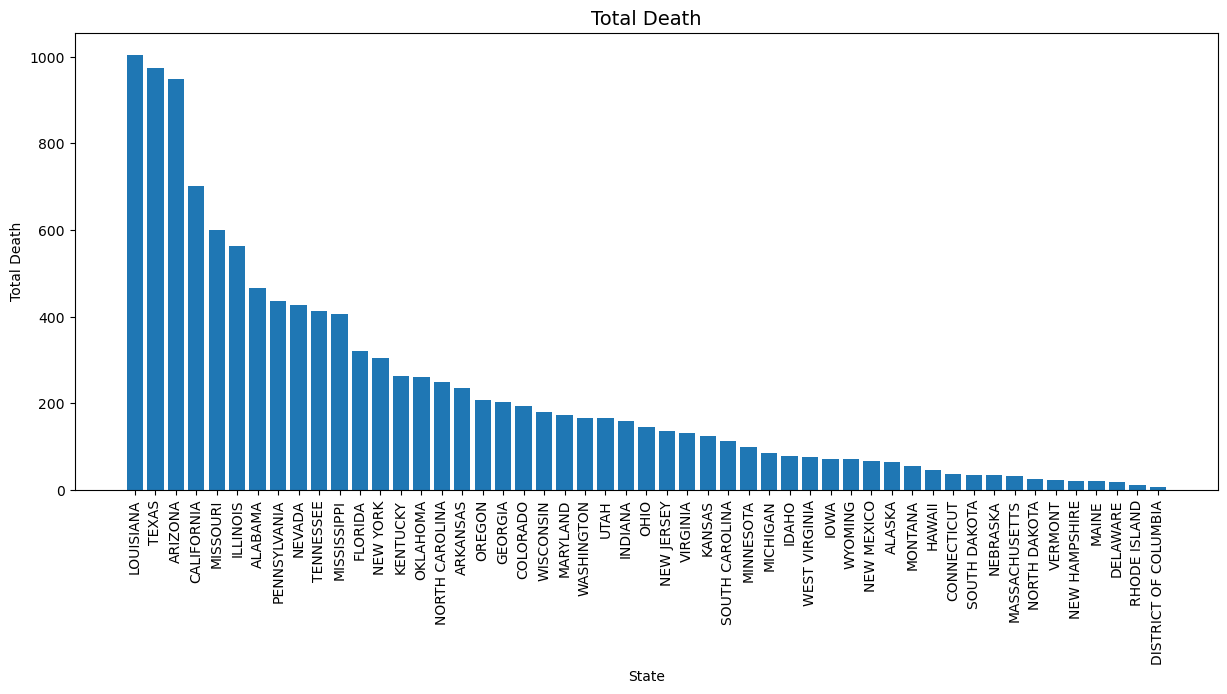

In [15]:
#Chart for total death per each state
df_state_climate = df_state_climate.sort_values(['deaths_direct'],ascending=False)

fig, ax = plt.subplots(1, figsize=(12,5))
fig.tight_layout(pad=0.5)

ax.bar(df_state_climate.index, df_state_climate['deaths_direct'])
ax.set_xlabel("State", fontsize=10)
ax.set_ylabel("Total Death", fontsize=10)
ax.set_title("Total Death", fontsize=14)
ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)
pass

/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/1351263875.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)


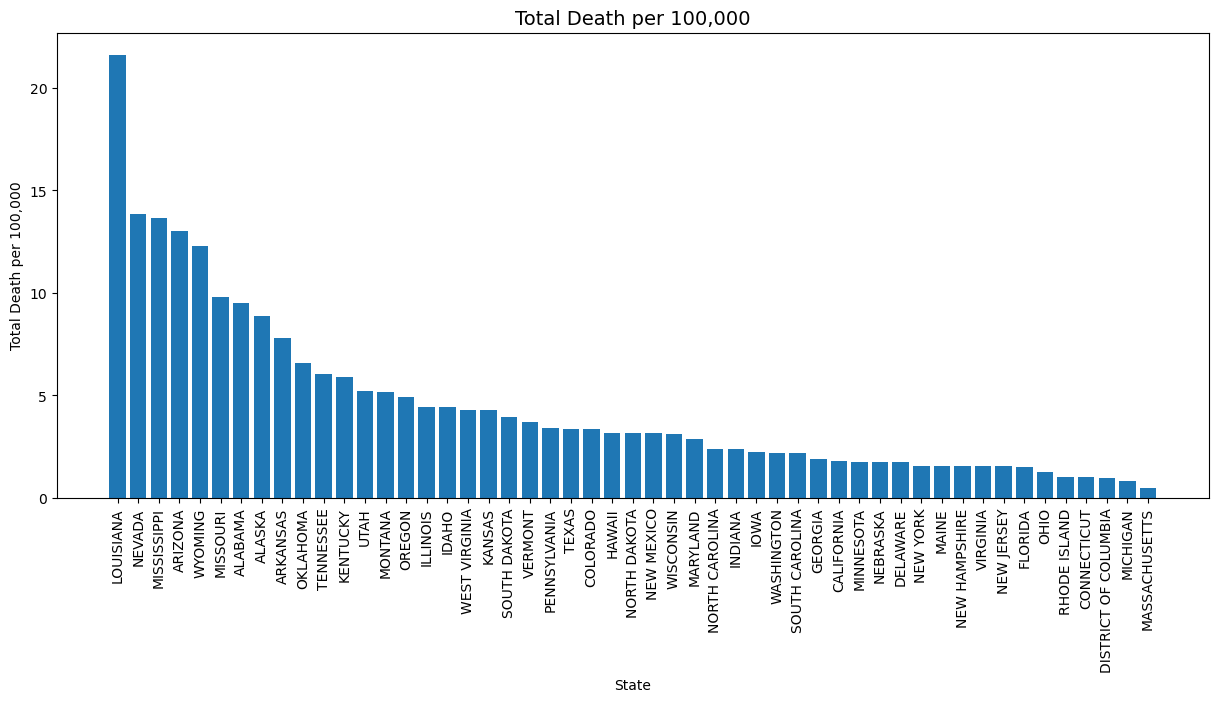

In [16]:
#Chart for per 100,000 death per each state

df_state_climate = df_state_climate.sort_values('deaths_per_100,000', ascending=False)

fig, ax = plt.subplots(1, figsize=(12,5))
fig.tight_layout(pad=0.2)

ax.bar(df_state_climate.index, df_state_climate['deaths_per_100,000'])
ax.set_xlabel("State", fontsize=10)
ax.set_ylabel("Total Death per 100,000", fontsize=10)
ax.set_title("Total Death per 100,000", fontsize=14)
ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)
pass

/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/1615649531.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)


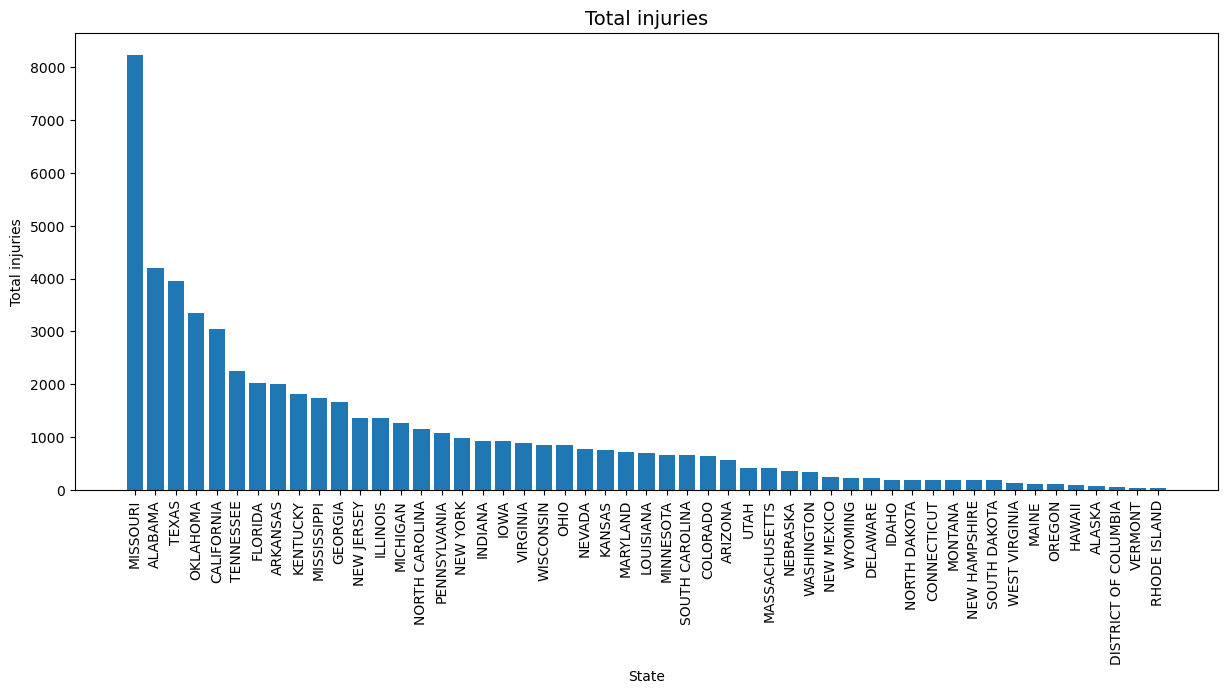

In [17]:
#Chart for total injuries per each state


df_state_climate = df_state_climate.sort_values(['injuries_direct'],ascending=False)
fig, ax = plt.subplots(1, figsize=(12,5))
fig.tight_layout(pad=0.5)

ax.bar(df_state_climate.index, df_state_climate['injuries_direct'])
ax.set_xlabel("State", fontsize=10)
ax.set_ylabel("Total injuries", fontsize=10)
ax.set_title("Total injuries", fontsize=14)
ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)
pass

/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/2534607246.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)


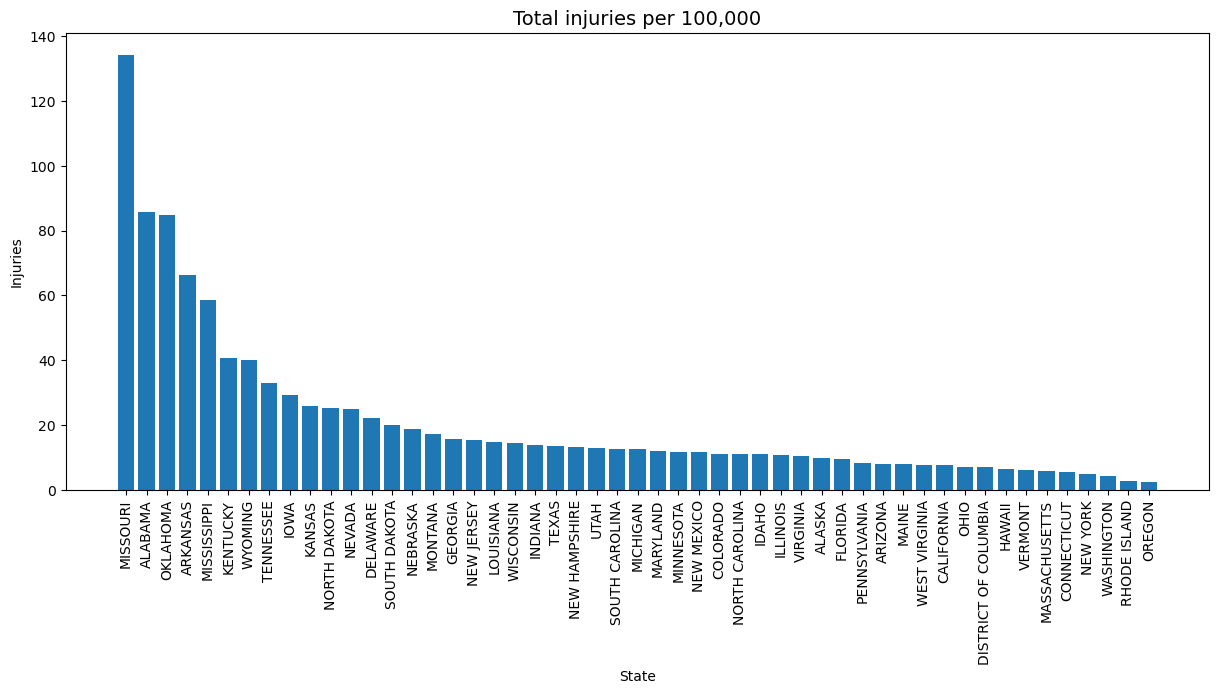

In [18]:
#Chart for per 100,000 injuries per each state


df_state_climate = df_state_climate.sort_values(['injuries_per_100,000'],ascending=False)
fig, ax = plt.subplots(1, figsize=(12,5))
fig.tight_layout(pad=0.5)

ax.bar(df_state_climate.index, df_state_climate['injuries_per_100,000'])
ax.set_xlabel("State", fontsize=10)
ax.set_ylabel("Injuries", fontsize=10)
ax.set_title("Total injuries per 100,000", fontsize=14)
ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)
pass

In [19]:
df_state_climate = df_state_climate.sort_values('damage_property', ascending=False)
df_state_climate.head(5)

,deaths_direct,injuries_direct,damage_property,population,"deaths_per_100,000","injuries_per_100,000"
state,,,,,,
TEXAS,975,3952,1.202637e+11,28995881,3.362547,13.629522
LOUISIANA,1005,691,1.102499e+11,4648794,21.618510,14.864070
FLORIDA,320,2023,4.803385e+10,21477737,1.489915,9.419056
NEW JERSEY,136,1360,3.792527e+10,8882190,1.531154,15.311539
CALIFORNIA,701,3044,3.487711e+10,39512223,1.774135,7.703945


/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/2953193804.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)


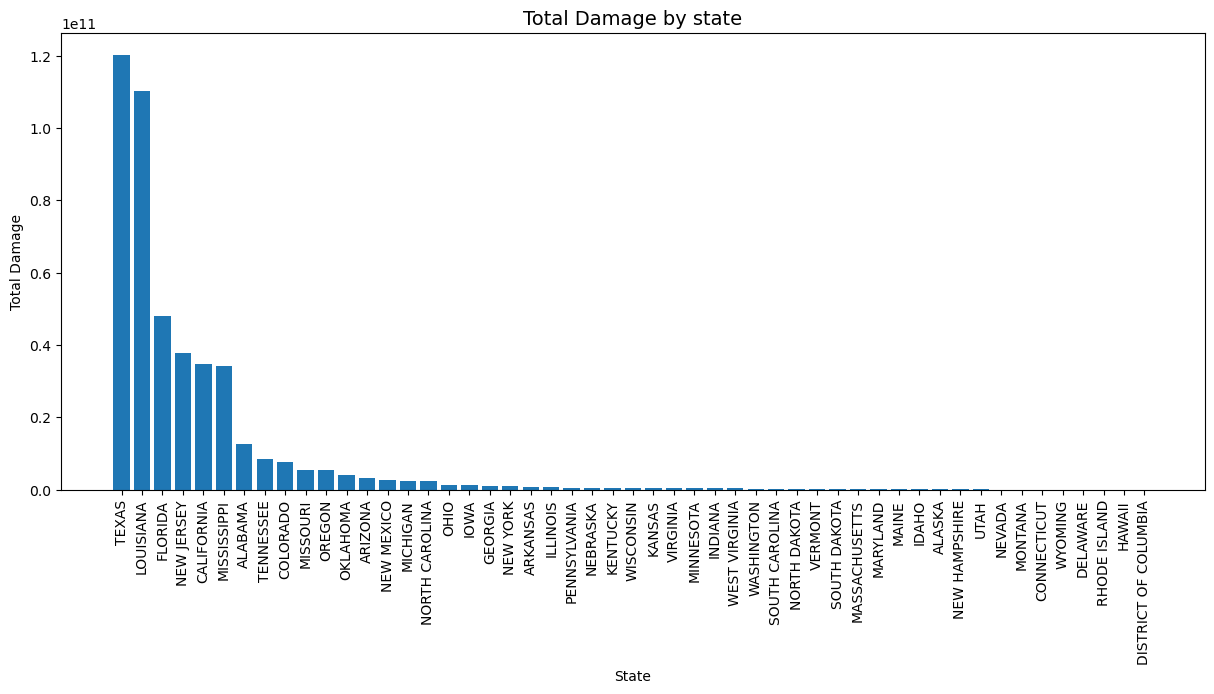

In [20]:
#Chart for total property damage per each state


df_state_climate = df_state_climate.sort_values(['damage_property'],ascending=False)
fig, ax = plt.subplots(1, figsize=(12,5))
fig.tight_layout(pad=0.5)

ax.bar(df_state_climate.index, df_state_climate['damage_property'])
ax.set_xlabel("State", fontsize=10)
ax.set_ylabel("Total Damage", fontsize=10)
ax.set_title("Total Damage by state", fontsize=14)
ax.set_xticklabels(df_state_climate.index, rotation=90, fontsize=10)
pass

In [21]:
#Create pivot table for states and event types with total of death and fill NA values with 0 and create total death for each state
#Sort by total death then remove states with no death reported if exist.

df_ev_dD = pd.pivot_table(df_location,values='deaths_direct' , index='state', columns='EV_TYPE_GRP', aggfunc='sum')
df_ev_dD.fillna(value=0, inplace=True)
df_ev_dD['total_death'] = df_location['deaths_direct'].groupby(df_location.state).sum()
df_ev_dD = df_ev_dD.sort_values('total_death',ascending=False)
df_ev_dD = df_ev_dD[df_ev_dD.total_death > 0]
df_ev_dD.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter,total_death
state,,,,,,,,,,,,
LOUISIANA,0.0,36.0,1.0,0.0,39.0,840.0,21.0,28.0,30.0,0.0,10.0,1005
TEXAS,30.0,345.0,0.0,1.0,241.0,49.0,51.0,56.0,58.0,0.0,144.0,975
ARIZONA,19.0,80.0,0.0,1.0,787.0,0.0,20.0,13.0,0.0,0.0,29.0,949
CALIFORNIA,213.0,111.0,10.0,1.0,187.0,69.0,14.0,60.0,0.0,1.0,35.0,701
MISSOURI,0.0,105.0,0.0,0.0,180.0,0.0,23.0,34.0,247.0,0.0,11.0,600


In [22]:
#Create pivot table for states and event types with count of events and fill NA values with 0 and create total count for each state then Sort by total count

df_ev_dD_C = pd.pivot_table(df_location,values='deaths_direct' , index='state', columns='EV_TYPE_GRP', aggfunc='count')
df_ev_dD_C.fillna(value=0, inplace=True)
df_ev_dD_C['total'] = df_location['deaths_direct'].groupby(df_location.state).count()
df_ev_dD_C = df_ev_dD_C.sort_values('total',ascending=False)
df_ev_dD_C.head(5)


EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter,total
state,,,,,,,,,,,,
TEXAS,1211.0,11959.0,209.0,28460.0,14429.0,585.0,767.0,22479.0,2994.0,0.0,7622.0,90715
KANSAS,60.0,4876.0,240.0,25642.0,2641.0,0.0,235.0,17436.0,2127.0,0.0,5956.0,59213
MISSOURI,66.0,8936.0,743.0,13144.0,4474.0,2.0,245.0,12707.0,1353.0,0.0,5995.0,47665
IOWA,18.0,9102.0,200.0,10891.0,2111.0,0.0,285.0,12269.0,1383.0,0.0,9750.0,46009
ILLINOIS,16.0,5671.0,1686.0,7916.0,3229.0,2.0,390.0,13950.0,1404.0,0.0,7618.0,41882


In [23]:
#Calculate percentage of events type total death from total of death on state and remove total death column

for col in df_ev_dD.columns:
    df_ev_dD[col] = df_ev_dD[col] / df_ev_dD['total_death']
df_ev_dD = df_ev_dD.drop('total_death', axis=1)
df_ev_dD.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter
state,,,,,,,,,,,
LOUISIANA,0.000000,0.035821,0.000995,0.000000,0.038806,0.835821,0.020896,0.027861,0.029851,0.000000,0.009950
TEXAS,0.030769,0.353846,0.000000,0.001026,0.247179,0.050256,0.052308,0.057436,0.059487,0.000000,0.147692
ARIZONA,0.020021,0.084299,0.000000,0.001054,0.829294,0.000000,0.021075,0.013699,0.000000,0.000000,0.030558
CALIFORNIA,0.303852,0.158345,0.014265,0.001427,0.266762,0.098431,0.019971,0.085592,0.000000,0.001427,0.049929
MISSOURI,0.000000,0.175000,0.000000,0.000000,0.300000,0.000000,0.038333,0.056667,0.411667,0.000000,0.018333


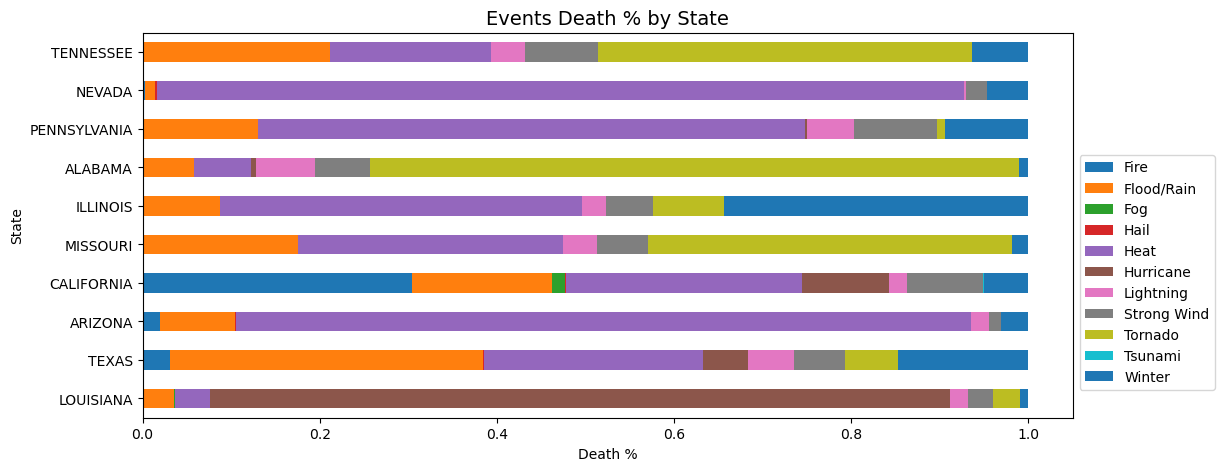

In [24]:
#Stacked horizontal bar chart for percentage of each event death per state

df_ev_dD.head(10).plot(kind='barh', stacked=True, legend=True, figsize=(12,5))

plt.legend(df_ev_dD.columns, bbox_to_anchor=(1.0, 0.7))
plt.title("Events Death % by State", fontsize=14)
plt.xlabel('Death %')
plt.ylabel('State')
plt.show()

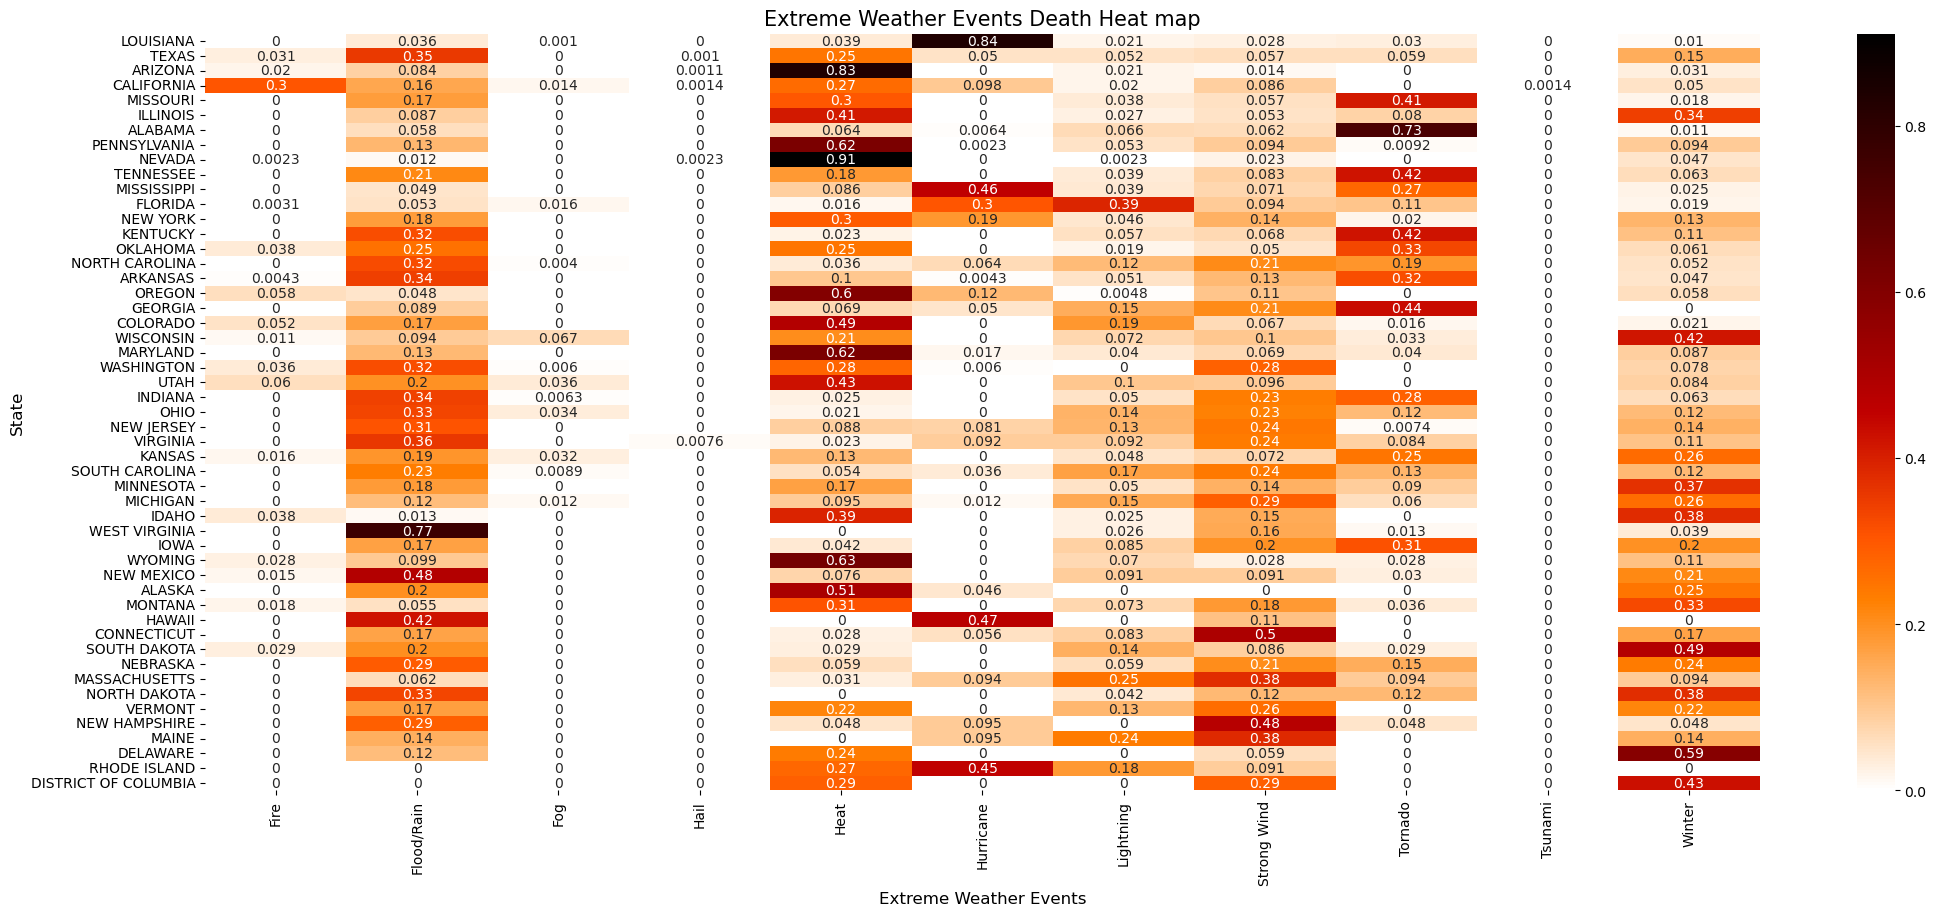

In [25]:
#Create Heat map for total death of different weather events per state

fig, ax = plt.subplots(1, figsize=(20,8))
fig.tight_layout(pad=.5)
ax = sns.heatmap(df_ev_dD, annot=True, cmap='gist_heat_r', linecolor='k', alpha=1)
ax.set_xticklabels(df_ev_dD.columns, rotation=90, fontsize=10)
ax.set_ylabel("State", fontsize=12)
ax.set_xlabel("Extreme Weather Events", fontsize=12)
ax.set_title('Extreme Weather Events Death Heat map', fontsize=15)
pass

In [26]:
#Create pivot table for states and event types with total of injuries and fill NA values with 0 and create total injuries for each state then Sort by total injuries

df_ev_dI = pd.pivot_table(df_location,values='injuries_direct' , index='state', columns='EV_TYPE_GRP', aggfunc='sum')
df_ev_dI.fillna(value=0, inplace=True)
df_ev_dI['total_injuries'] = df_location['injuries_direct'].groupby(df_location.state).sum()
df_ev_dI = df_ev_dI.sort_values('total_injuries',ascending=False)
df_ev_dI.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter,total_injuries
state,,,,,,,,,,,,
MISSOURI,6.0,34.0,0.0,7.0,5497.0,2.0,62.0,373.0,2190.0,0.0,67.0,8238
ALABAMA,0.0,21.0,20.0,1.0,532.0,13.0,142.0,223.0,3243.0,0.0,2.0,4197
TEXAS,172.0,334.0,4.0,78.0,963.0,50.0,173.0,389.0,1464.0,0.0,325.0,3952
OKLAHOMA,49.0,173.0,0.0,25.0,1480.0,0.0,35.0,166.0,1408.0,0.0,14.0,3350
CALIFORNIA,1309.0,365.0,261.0,12.0,484.0,99.0,61.0,244.0,3.0,0.0,206.0,3044


In [27]:
#Create pivot table for states and event types with count of events and fill NA values with 0 and create total count for each state then Sort by total count

df_ev_dI_C = pd.pivot_table(df_location,values='injuries_direct' , index='state', columns='EV_TYPE_GRP', aggfunc='count')
df_ev_dI_C.fillna(value=0, inplace=True)
df_ev_dI_C['total'] = df_location['injuries_direct'].groupby(df_location.state).count()
df_ev_dI_C = df_ev_dI_C.sort_values('total',ascending=False)
df_ev_dI_C.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter,total
state,,,,,,,,,,,,
TEXAS,1211.0,11959.0,209.0,28460.0,14429.0,585.0,767.0,22479.0,2994.0,0.0,7622.0,90715
KANSAS,60.0,4876.0,240.0,25642.0,2641.0,0.0,235.0,17436.0,2127.0,0.0,5956.0,59213
MISSOURI,66.0,8936.0,743.0,13144.0,4474.0,2.0,245.0,12707.0,1353.0,0.0,5995.0,47665
IOWA,18.0,9102.0,200.0,10891.0,2111.0,0.0,285.0,12269.0,1383.0,0.0,9750.0,46009
ILLINOIS,16.0,5671.0,1686.0,7916.0,3229.0,2.0,390.0,13950.0,1404.0,0.0,7618.0,41882


In [28]:
#Calculate percentage of events type total injuries from total of injuries on state and remove total injuries column

for col in df_ev_dI.columns:
    df_ev_dI[col] = df_ev_dI[col] / df_ev_dI['total_injuries']
df_ev_dI = df_ev_dI.drop('total_injuries', axis=1)
df_ev_dI.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter
state,,,,,,,,,,,
MISSOURI,0.000728,0.004127,0.000000,0.000850,0.667274,0.000243,0.007526,0.045278,0.265841,0.0,0.008133
ALABAMA,0.000000,0.005004,0.004765,0.000238,0.126757,0.003097,0.033834,0.053133,0.772695,0.0,0.000477
TEXAS,0.043522,0.084514,0.001012,0.019737,0.243674,0.012652,0.043775,0.098431,0.370445,0.0,0.082237
OKLAHOMA,0.014627,0.051642,0.000000,0.007463,0.441791,0.000000,0.010448,0.049552,0.420299,0.0,0.004179
CALIFORNIA,0.430026,0.119908,0.085742,0.003942,0.159001,0.032523,0.020039,0.080158,0.000986,0.0,0.067674


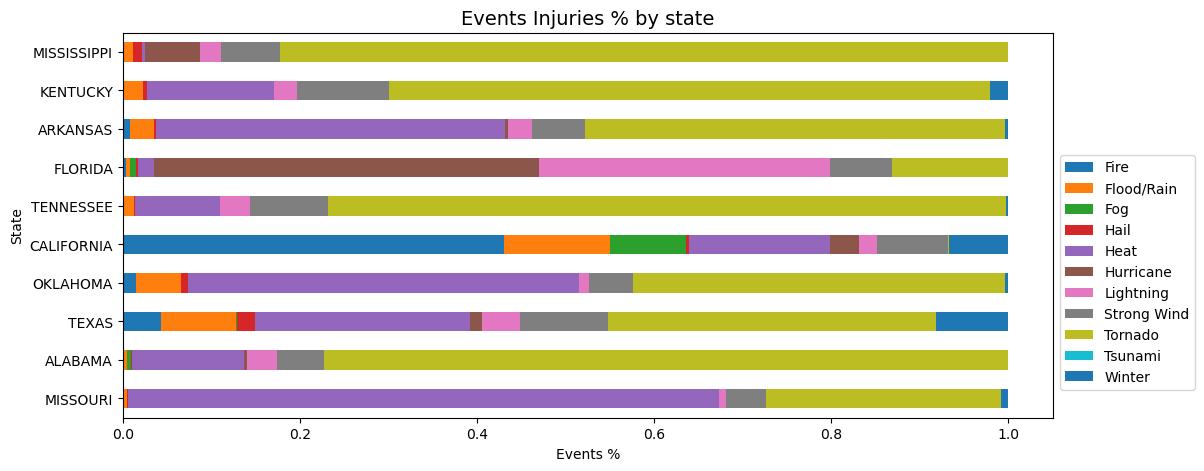

In [29]:
#Stacked horizontal bar chart for percentage of each event injuries per state

df_ev_dI.head(10).plot(kind='barh', stacked=True, legend=True, figsize=(12,5))

plt.legend(df_ev_dI.columns, bbox_to_anchor=(1.0, 0.7))
plt.title("Events Injuries % by state", fontsize=14)
plt.xlabel('Events %')
plt.ylabel('State')
plt.show()

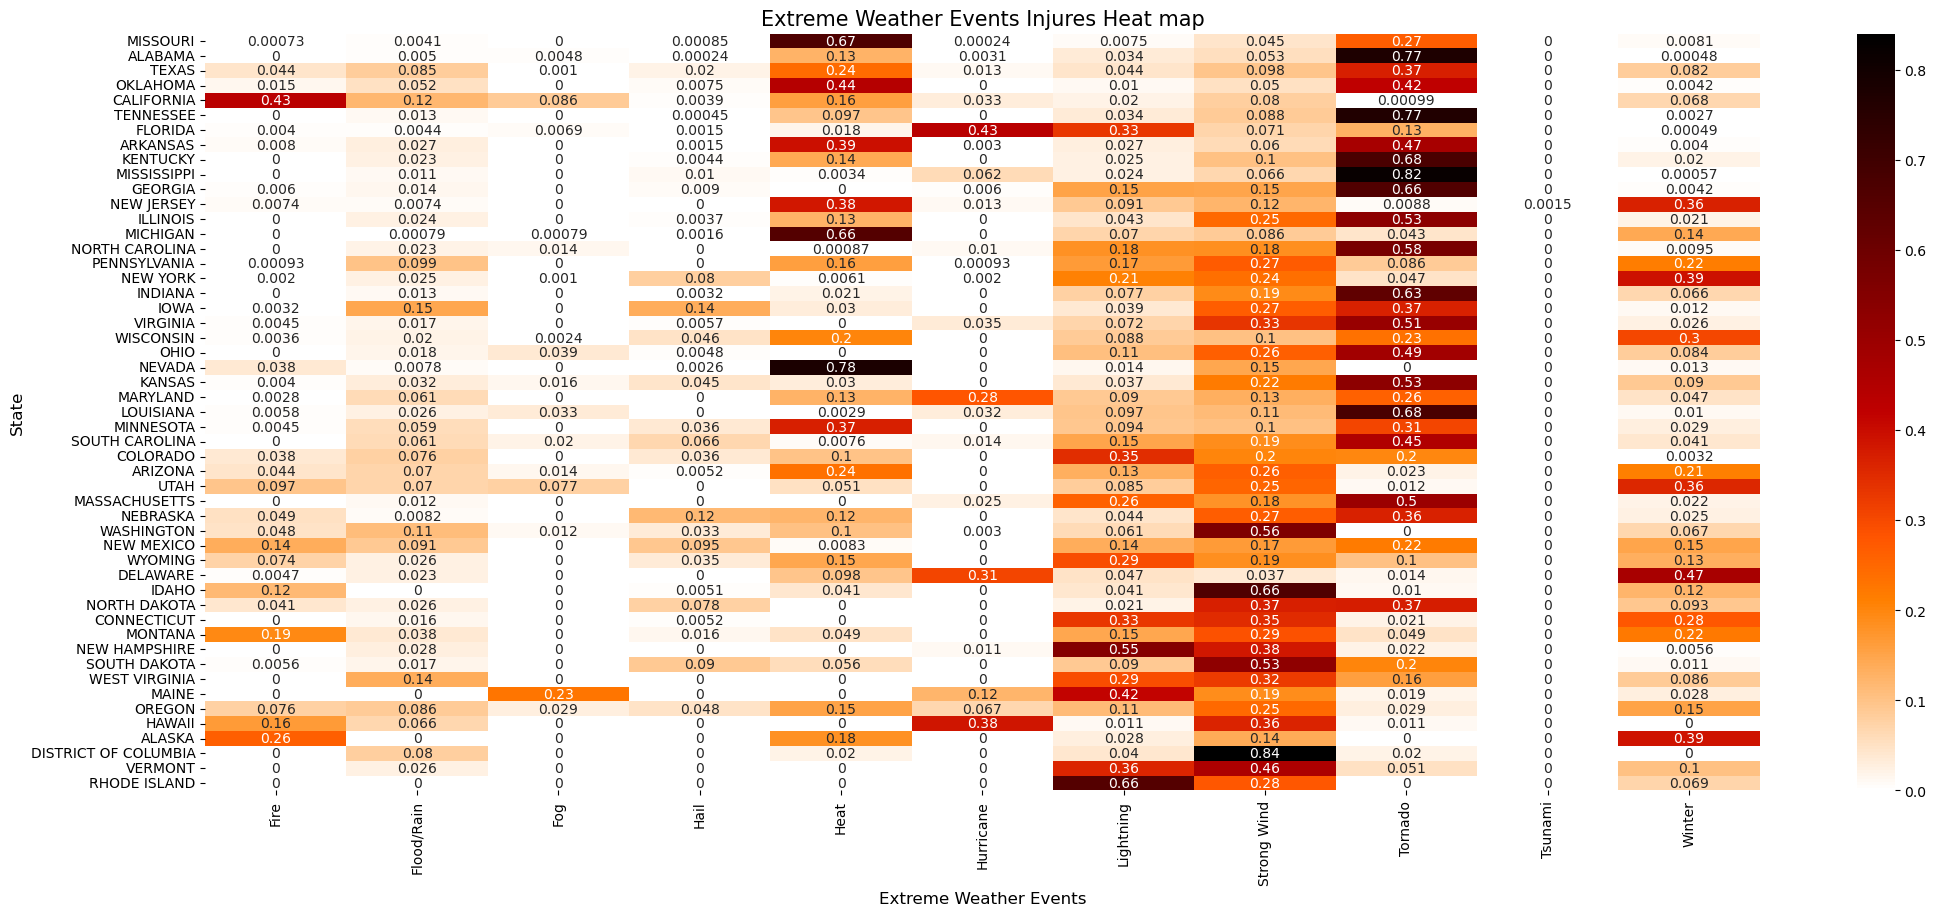

In [30]:
#Create Heat map for total injuries of different weather events per state

fig, ax = plt.subplots(1, figsize=(20,8))
fig.tight_layout(pad=.5)
ax = sns.heatmap(df_ev_dI, annot=True, cmap='gist_heat_r', alpha=1)
ax.set_xticklabels(df_ev_dI.columns, rotation=90, fontsize=10)
ax.set_ylabel("State", fontsize=12)
ax.set_xlabel("Extreme Weather Events", fontsize=12)
ax.set_title('Extreme Weather Events Injures Heat map', fontsize=15)
pass

In [31]:
#Create pivot table for states and event types with total of damage and fill NA values with 0 and create total damage for each state 
#Sort by total injuries and remove states with 0 total damage if exist

df_ev_dP = pd.pivot_table(df_location,values='damage_property' , index='state', columns='EV_TYPE_GRP', aggfunc='sum')
df_ev_dP.fillna(value=0, inplace=True)
df_ev_dP['total_damage'] = df_location['damage_property'].groupby(df_location.state).sum()
df_ev_dP = df_ev_dP.sort_values('total_damage',ascending=False)
df_ev_dP = df_ev_dP[df_ev_dP.total_damage >=1]
df_ev_dP.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter,total_damage
state,,,,,,,,,,,,
TEXAS,8.339992e+07,7.475763e+10,1188250.0,2.742294e+09,48741000.0,3.894368e+10,85641517.5,4.511679e+08,2.982663e+09,0.0,167297410.0,1.202637e+11
LOUISIANA,3.676750e+06,7.371814e+09,428750.0,1.313655e+07,507500.0,1.025282e+11,25345162.5,1.388600e+08,1.413921e+08,0.0,26479250.0,1.102499e+11
FLORIDA,1.401138e+07,1.128870e+08,1540000.0,3.496150e+06,0.0,4.756825e+10,78837325.0,1.497340e+08,1.001252e+08,0.0,4972117.5,4.803385e+10
NEW JERSEY,2.758000e+06,5.339838e+07,17500.0,7.997500e+05,0.0,3.504477e+10,33287240.0,2.764770e+09,6.312250e+06,0.0,19148500.0,3.792527e+10
CALIFORNIA,3.433092e+10,2.197316e+08,15582875.0,3.713761e+07,3867500.0,9.147775e+06,7192027.5,2.206768e+08,1.385510e+07,2114000.0,16884000.0,3.487711e+10


In [32]:
#Create pivot table for states and event types with count of events and fill NA values with 0 and create total count for each state then Sort by total count

df_ev_dP_C = pd.pivot_table(df_location,values='damage_property' , index='state', columns='EV_TYPE_GRP', aggfunc='count')
df_ev_dP_C.fillna(value=0, inplace=True)
df_ev_dP_C['total'] = df_location['damage_property'].groupby(df_location.state).count()
df_ev_dP_C = df_ev_dI_C.sort_values('total',ascending=False)
df_ev_dP_C.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter,total
state,,,,,,,,,,,,
TEXAS,1211.0,11959.0,209.0,28460.0,14429.0,585.0,767.0,22479.0,2994.0,0.0,7622.0,90715
KANSAS,60.0,4876.0,240.0,25642.0,2641.0,0.0,235.0,17436.0,2127.0,0.0,5956.0,59213
MISSOURI,66.0,8936.0,743.0,13144.0,4474.0,2.0,245.0,12707.0,1353.0,0.0,5995.0,47665
IOWA,18.0,9102.0,200.0,10891.0,2111.0,0.0,285.0,12269.0,1383.0,0.0,9750.0,46009
ILLINOIS,16.0,5671.0,1686.0,7916.0,3229.0,2.0,390.0,13950.0,1404.0,0.0,7618.0,41882


In [33]:
#Calculate percentage of events type total damage from total of damage in state and remove total damage column

for col in df_ev_dP.columns:
    df_ev_dP[col] = df_ev_dP[col] / df_ev_dP['total_damage']
df_ev_dP = df_ev_dP.drop('total_damage', axis=1)
df_ev_dP.head(5)

EV_TYPE_GRP,Fire,Flood/Rain,Fog,Hail,Heat,Hurricane,Lightning,Strong Wind,Tornado,Tsunami,Winter
state,,,,,,,,,,,
TEXAS,0.000693,0.621614,9.880371e-06,0.022802,0.000405,0.323819,0.000712,0.003751,0.024801,0.000000,0.001391
LOUISIANA,0.000033,0.066865,3.888893e-06,0.000119,0.000005,0.929962,0.000230,0.001260,0.001282,0.000000,0.000240
FLORIDA,0.000292,0.002350,3.206072e-05,0.000073,0.000000,0.990307,0.001641,0.003117,0.002084,0.000000,0.000104
NEW JERSEY,0.000073,0.001408,4.614338e-07,0.000021,0.000000,0.924048,0.000878,0.072900,0.000166,0.000000,0.000505
CALIFORNIA,0.984340,0.006300,4.467937e-04,0.001065,0.000111,0.000262,0.000206,0.006327,0.000397,0.000061,0.000484


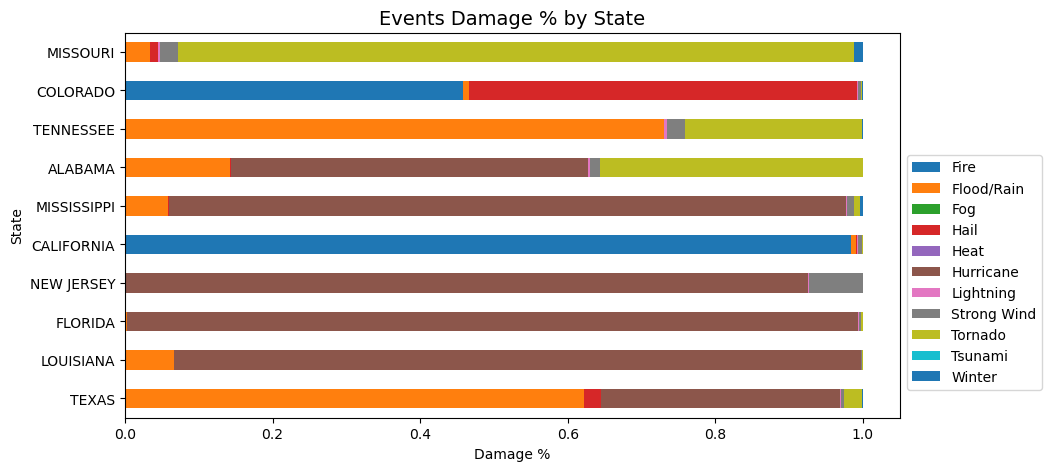

In [34]:
#Stacked horizontal bar chart for percentage of each event damage per state

df_ev_dP.head(10).plot(kind='barh', stacked=True, legend=True, figsize=(10,5))

plt.title("Events Damage % by State", fontsize=14)
plt.legend(df_ev_dP.columns, bbox_to_anchor=(1.0, 0.7))
plt.xlabel('Damage %')
plt.ylabel('State')
plt.show()

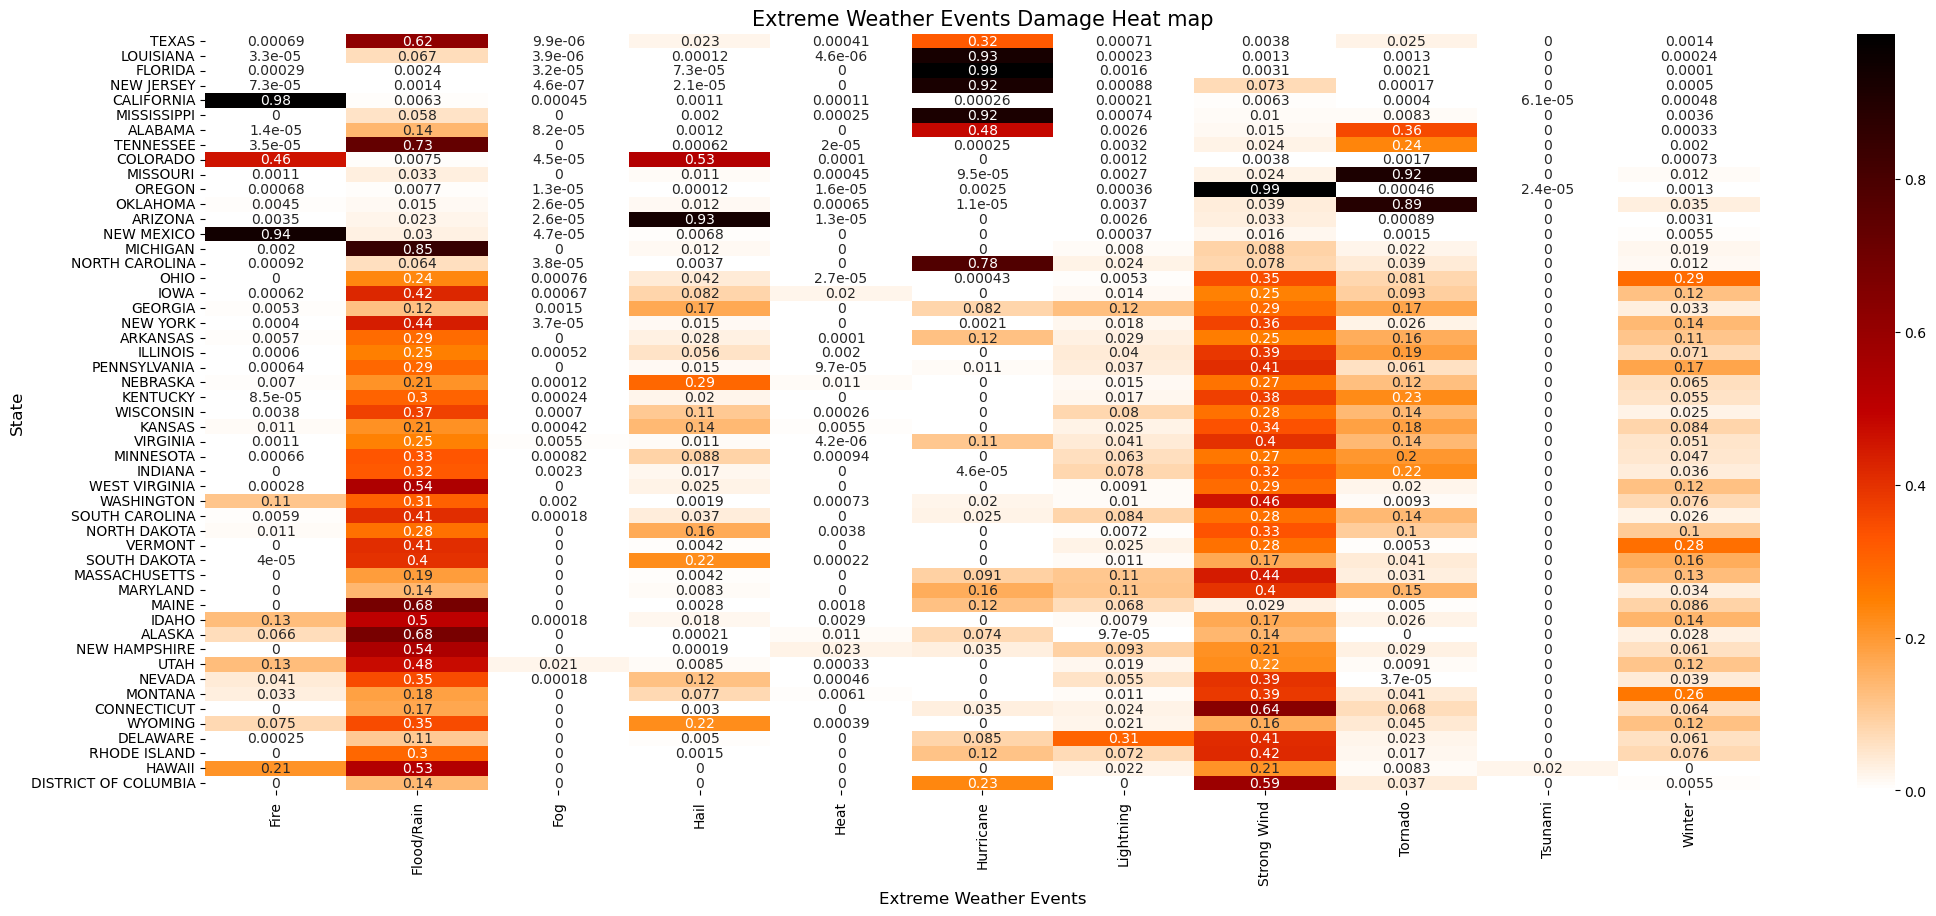

In [46]:
#Create Heat map for total damage of different weather events per state

fig, ax = plt.subplots(1, figsize=(20,8))
fig.tight_layout(pad=.5)
ax = sns.heatmap(df_ev_dP, annot=True, cmap='gist_heat_r', alpha=1)
ax.set_xticklabels(df_ev_dP.columns, rotation=90, fontsize=10)
ax.set_ylabel("State", fontsize=12)
ax.set_xlabel("Extreme Weather Events", fontsize=12)
ax.set_title('Extreme Weather Events Damage Heat map', fontsize=15)
pass

/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/3031931379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_CT_P['Damage'] = df_state_CT_P['damage_property'] / df_state_CT_P['damage_property'].sum()


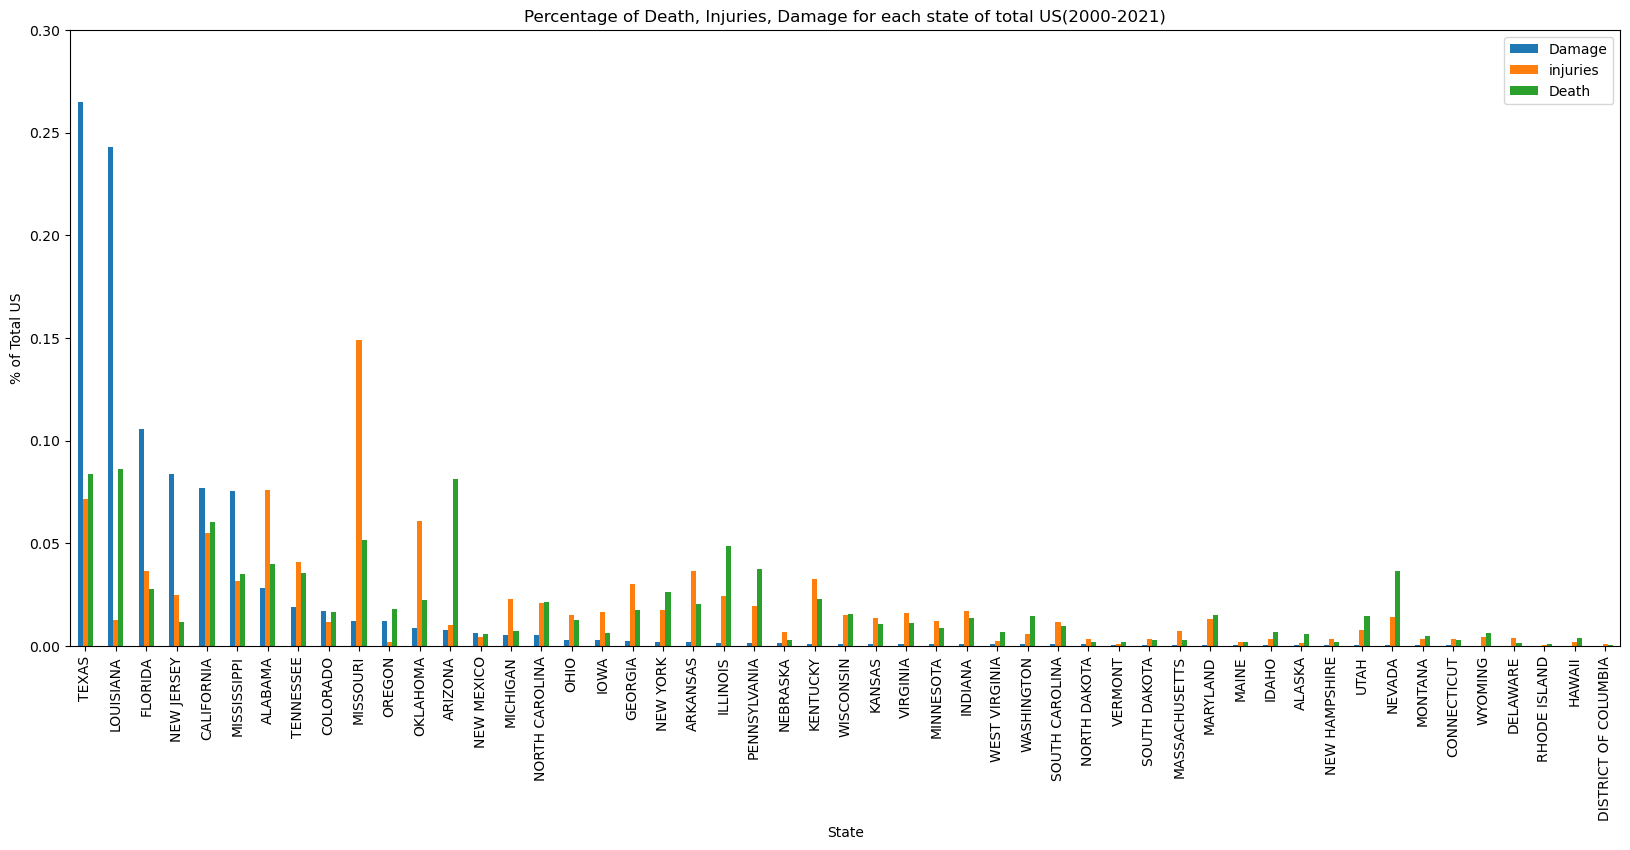

In [36]:
#Count percentage of total death, injuries and damage per state from the US total death, injuries and damage
#Bar chart for percentage of each event death, injuries and damage for each state of total US


df_state_CT_P = df_state_climate[['damage_property','injuries_direct','deaths_direct']]
df_state_CT_P['Damage'] = df_state_CT_P['damage_property'] / df_state_CT_P['damage_property'].sum()
df_state_CT_P = df_state_CT_P.drop('damage_property', axis=1)
df_state_CT_P['injuries'] = df_state_CT_P['injuries_direct'] / df_state_CT_P['injuries_direct'].sum()
df_state_CT_P = df_state_CT_P.drop('injuries_direct', axis=1)
df_state_CT_P['Death'] = df_state_CT_P['deaths_direct'] / df_state_CT_P['deaths_direct'].sum()
df_state_CT_P = df_state_CT_P.drop('deaths_direct', axis=1)
#df_state_CT_P = df_state_CT_P.drop('state', axis=1)
df_state_CT_P.plot(figsize=(20, 8), 
                            kind='bar', 
                            stacked=False,
                            yticks=[0,0.05,0.10,0.15,0.20,0.25,0.30],
                            title='Percentage of Death, Injuries, Damage for each state of total US(2000-2021)',
                            xlabel='State',
                            ylabel='% of Total US')
plt.show()

In [37]:
#State abbrev code mapping
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District Of Columbia": "DC"
}

#Create Column for state equal the group by table index
#cast values of state column to string title case
df_state_climate['state'] = df_state_climate.index
df_state_climate['state'] = df_state_climate['state'].str.title()


In [47]:
#Create dataframe for death per state only data and create new column with State abbrev
state_death = df_state_climate[['state', 'deaths_direct']]
state_death['ST'] = state_death.state.map(us_state_to_abbrev)

#look at the data sorted by death numbers 
state_death.sort_values('deaths_direct', ascending=False).head(3)

/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/573266880.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,deaths_direct,ST
state,,,
LOUISIANA,Louisiana,1005,LA
TEXAS,Texas,975,TX
ARIZONA,Arizona,949,AZ


In [40]:
#Create a US map plotted with Total Death number by color using the Plotly express package
#Change dimensions and Color scale
#update title text and position and chart margin

fig_death = px.choropleth(locations=state_death['ST'],
                            locationmode="USA-states", 
                            featureidkey=True,
                            color=state_death['deaths_direct'], 
                            scope="usa",
                            color_continuous_scale="orRd",
                            hover_name=state_death['state'],
                            labels={'color': 'Death'},
                            width=1000, height=500
                            )
fig_death.update_layout(title_text='Weather Events Death by states (2000-2021)', title_x=0.5, 
                            margin={"r":50,"t":50,"l":50,"b":50},
                            )
fig_death.show()

In [41]:
#Create dataframe for injuries per state only data and create new column with State abbrev and sort by injuries

state_injuries = df_state_climate[['state', 'injuries_direct']]
state_injuries['ST'] = state_injuries.state.map(us_state_to_abbrev)
state_injuries = state_injuries.sort_values('injuries_direct',ascending=False)
state_injuries.head(5)

/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/2172376868.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,injuries_direct,ST
state,,,
MISSOURI,Missouri,8238,MO
ALABAMA,Alabama,4197,AL
TEXAS,Texas,3952,TX
OKLAHOMA,Oklahoma,3350,OK
CALIFORNIA,California,3044,CA


In [42]:
#Create a US map plotted with Total injuries number by color using the Plotly express package
#Change dimensions and Color scale
#update title text and position and chart margin

fig_injuries = px.choropleth(locations=state_injuries['ST'],
                            locationmode="USA-states", 
                            featureidkey=True,
                            color=state_injuries['injuries_direct'], 
                            scope="usa",
                            color_continuous_scale="orRd",
                            hover_name=state_injuries['state'],
                            labels={'color': 'Injuries'},
                            width=1000, height=500
                            )
fig_injuries.update_layout(title_text='Weather Events Injuries by States (2000-2021)', title_x=0.5, 
                            margin={"r":50,"t":50,"l":50,"b":50},
                            )
fig_injuries.show()

In [43]:
#Create dataframe for injuries per state only data and create new column with State abbrev and sort by injuries

state_damage = df_state_climate[['state', 'damage_property']]
state_damage['ST'] = state_damage.state.map(us_state_to_abbrev)
state_damage = state_damage.sort_values('damage_property', ascending=False)
state_damage.head(5)

/var/folders/m4/_pw2rlnn3cs1j7rqvm0_ts8h0000gq/T/ipykernel_66243/3432635222.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,damage_property,ST
state,,,
TEXAS,Texas,1.202637e+11,TX
LOUISIANA,Louisiana,1.102499e+11,LA
FLORIDA,Florida,4.803385e+10,FL
NEW JERSEY,New Jersey,3.792527e+10,NJ
CALIFORNIA,California,3.487711e+10,CA


In [44]:
#Create a US map plotted with Total damage by color using the Plotly express package.
#Change dimensions and Color scale
#update title text and position and chart margin

fig_damage = px.choropleth(locations=state_death['ST'],
                            locationmode="USA-states", 
                            featureidkey=True,
                            color=state_damage['damage_property'], 
                            scope="usa",
                            color_continuous_scale="orRd",
                            hover_name=state_death['state'],
                            labels={'color': 'Damage'},
                            width=1000, height=500
                            )
fig_damage.update_layout(title_text='Weather Events Damage by State (2000-2021)', title_x=0.5, 
                            margin={"r":50,"t":50,"l":50,"b":50},
                            )
fig_damage.show()